In [11]:
# import modules
import os
from glob import glob
import joblib

import torch
import torch.nn as nn
import torchvision.models as models

from fogvision import gpuutils
from fogvision import fogimageclass

# FogVision image classification models
There are two fogvision inference classification heads one for diurnal and one for nocturnal imagery; both working with resnet50 embeddings

In [ ]:
# initialize embedder 
basemodel = models.resnet50(pretrained=True)

num_ftrs = basemodel.fc.in_features
basemodel.fc = nn.Identity()  # Set the classification layer to identity to output embeddings

# choose device
device = gpuutils.get_gpu_most_memory() # if gpus avaible get one with most memory
print(device)

# put the model in evaluation mode
model = basemodel.to(device)
model.eval()


# initialize classification heads (saved from cpu)
diurnal_classif_head = torch.load(os.path.join('models', f'fogvision_inference_head_model_diurnal.pkl'), map_location=device)
# diurnal_classif_head.to(device)
nocturnal_classif_head = torch.load(os.path.join('models', f'fogvision_inference_head_model_nocturnal.pkl'), map_location=device)
# nocturnal_classif_head.to(device)
print()


cpu



C:\Users\Joel Nic\AppData\Local\Temp\ipykernel_9848\2709800176.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  diurnal_classif_head = torch.load(os.path.join('models', 

# FogVision image classification
The fog image class can be used to classify images (as shown below). Given the image filepath, the embedding mode and the classification head model.

tensor([0.8111, 0.0808])
0


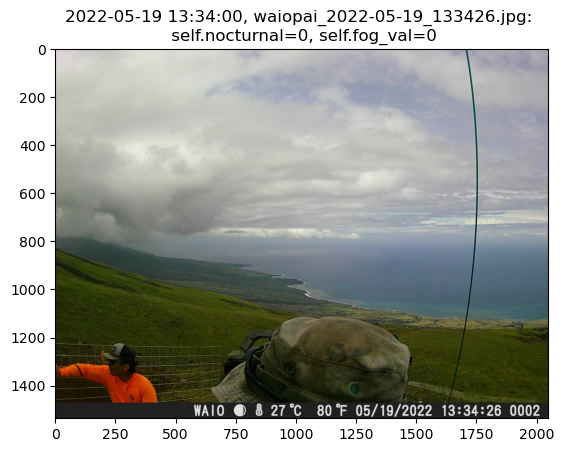

tensor([0.6171, 0.2860])
0


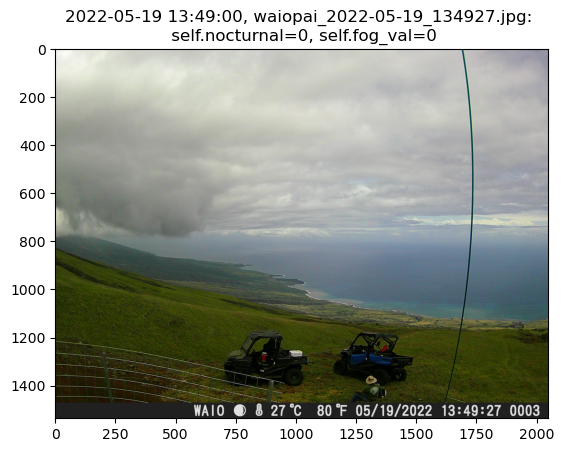

tensor([0.9483, 0.0091])
0


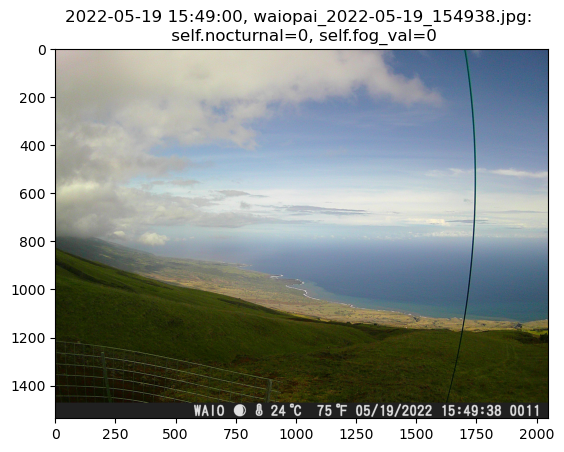

tensor([0.9439, 0.0105])
0


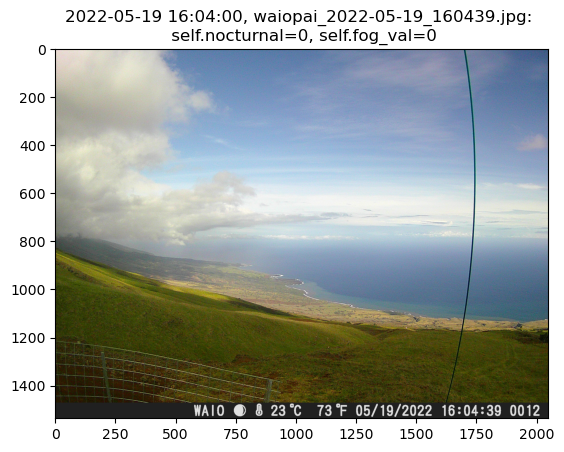

tensor([0.8817, 0.0408])
0


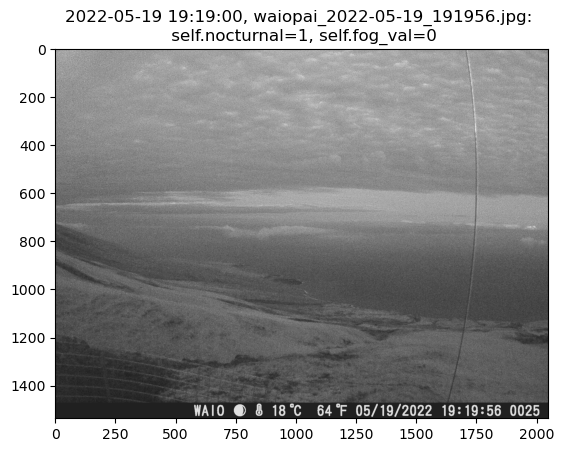

tensor([0.6459, 0.2587])
0


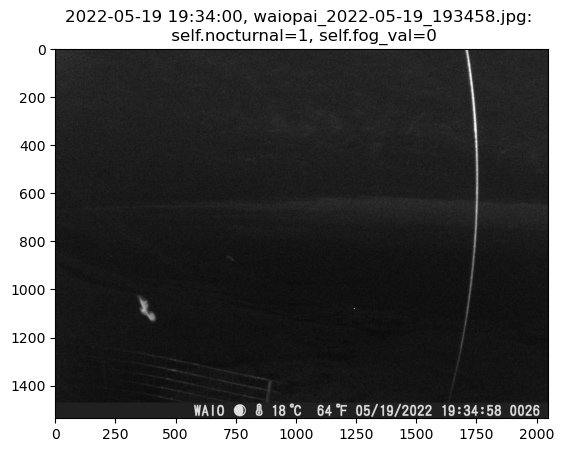

tensor([0.9273, 0.0154])
0


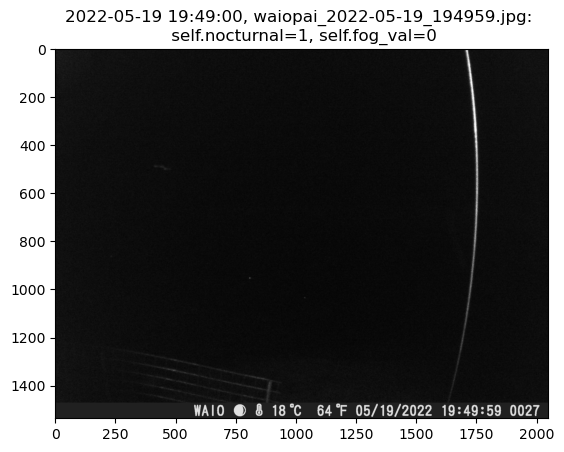

tensor([0.9732, 0.0031])
0


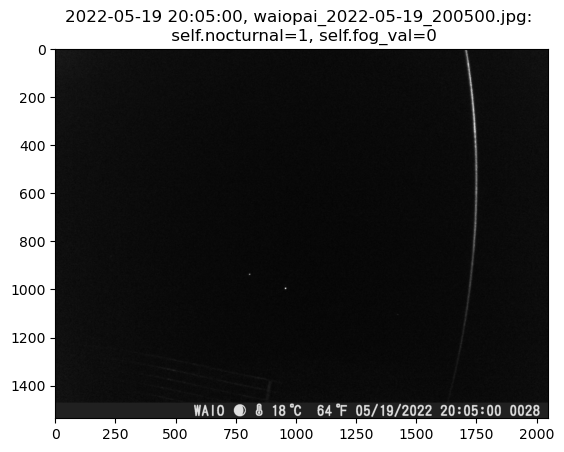

tensor([0.3283, 0.7623])
1


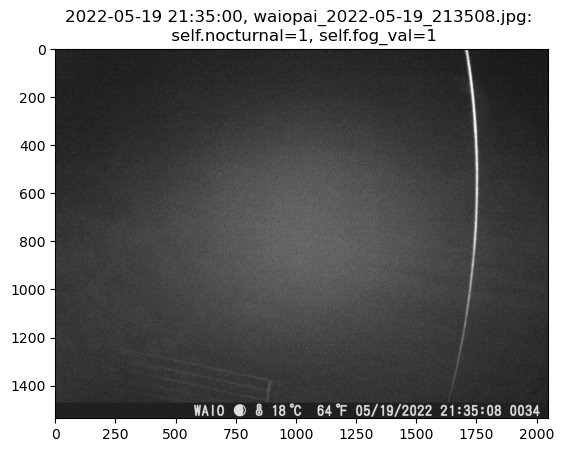

tensor([0.3422, 0.7434])
1


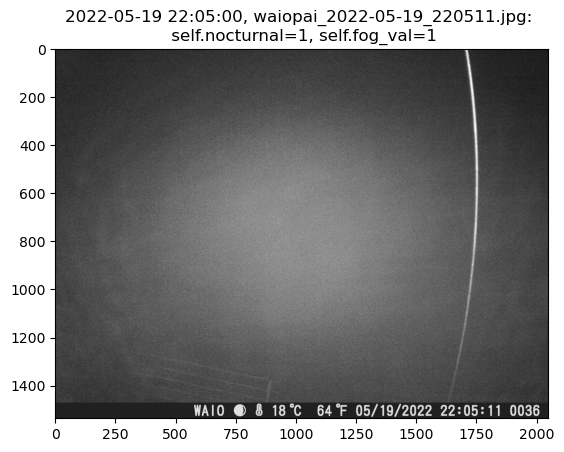

tensor([0.3219, 0.7714])
1


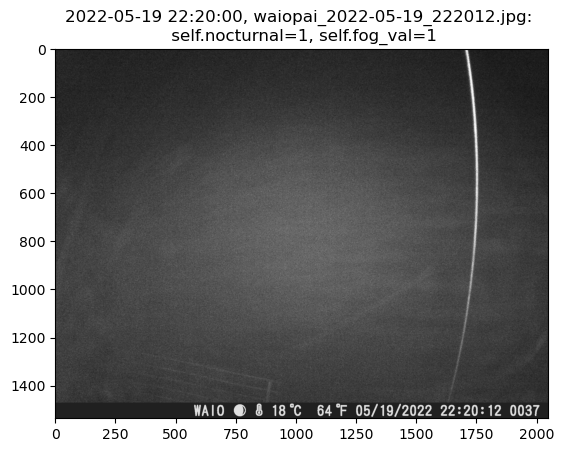

tensor([0.0450, 0.9903])
1


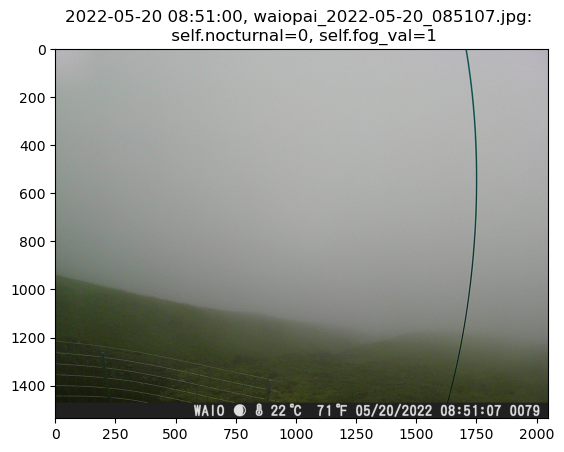

tensor([0.0657, 0.9821])
1


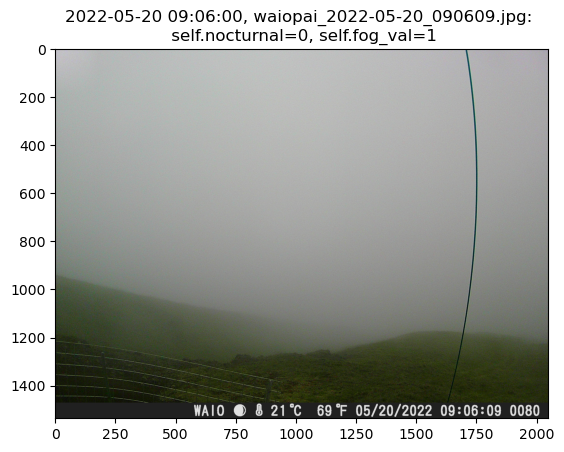

tensor([0.1710, 0.9118])
1


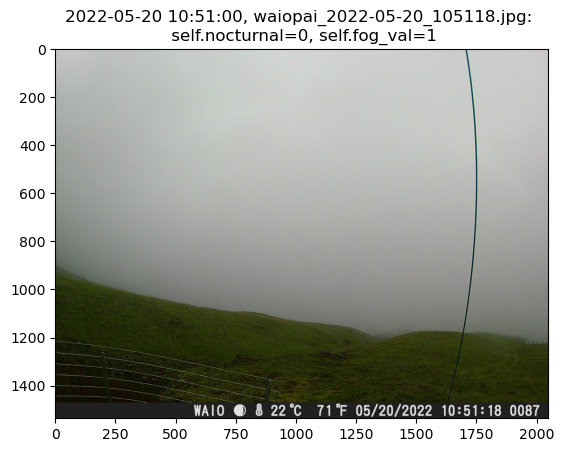

tensor([0.1978, 0.8867])
1


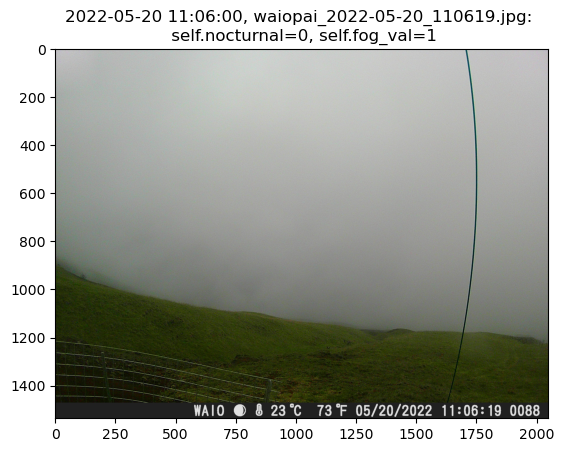

tensor([0.4239, 0.6157])
1


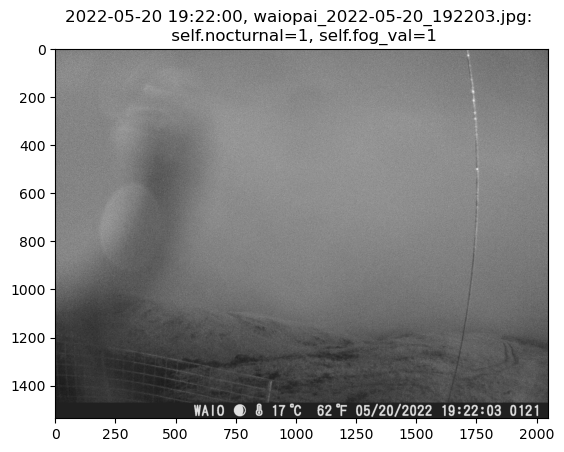

In [13]:
import importlib
importlib.reload(fogimageclass)
image_fns = glob(os.path.join('data', 'images', '*.jpg'))

for fn in image_fns:
    fog_img_class = fogimageclass.FogImage(filepath=fn)
    if fog_img_class.nocturnal:
        fog_img_class.get_fog_val_multiple_regions(model=nocturnal_classif_head, embedding_model=basemodel)
    else:
        fog_img_class.get_fog_val_multiple_regions(model=diurnal_classif_head, embedding_model=basemodel)

    fog_img_class.plot_image() # plot image with nocturnal and fog value